In [2]:
import numpy as np
from tqdm.notebook import tqdm
import pylab as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
def threedoors(which):

    labels = np.arange(3) # Labels of the three doors
    doors = np.zeros(3,dtype=int) # Content of three doors
    doors[np.random.choice(labels)] = 1 # One of them contains the prize, don't know which one
    choice = np.random.choice(labels) # I pick one door
    notchosen = np.delete(labels,choice) # These are the remaining doors 

    while True:
        opened = np.random.choice(notchosen) #One door is opened
        if doors[opened]==0: # But it's never the winning door
            other = int(np.delete(labels,[opened,choice])) # This is the other door left
            break
    
    
    if which == 'switch': # Do you switch? If yes, return content of the other door 
        return doors[other]

    elif which == 'keep': # If not, return content of the one you picked initially
        return doors[choice]
 
    elif which == 'external': # A third guy picks randomly between the two remaining doors
        picked = np.random.choice([choice,other])
        return doors[picked]
    

In [4]:
N  = int(1e5) # Do this many times
probs = {}

for which in tqdm(['switch','keep','external']):
    events = [threedoors(which) for i in tqdm(range(N))]
    probs[which] = np.sum(events)/ N


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

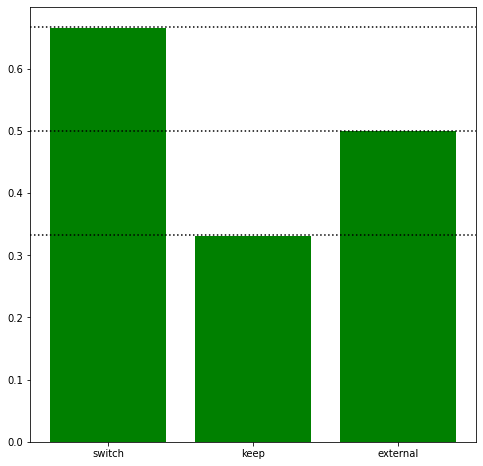

In [5]:
# A simple bar chart
plt.bar([0,1,2], [probs[k] for k in probs.keys()], color='green');
plt.xticks([0,1,2], probs.keys());

for y in [1/3,1/2,2/3]:
    plt.axhline(y, ls='dotted',c='black')

### Let's break it down:

Before a door is opened, the probability of finding a car is clearly 1/number_of_doors=$1/3$.

After one door has been opened:

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$

But if the host opens **Door 3** to show a goat, you now have prior information to update your probability of the car being behind **Door 2**. The probability of the car behind **Door 1** is still $1/3$, but the total probability must sum to unity, and you only have **Door 2** left. Hence,

* With prior knowledge of **Door 3** containing a goat, the probability of car behind **Door 2** $=2/3$.


So, ***switching doubles your chances***. You should always switch!! But only because you had prior information.  If someone walked in after the "bad" door was opened, then their probability of winning is the expected 1/number_of_doors=$1/2$.

This actually becomes easier to understand as $N$ increases. For $N$ choices, revealing $N-2$ "answers" doesn't change the probability of your original door choice. It is still $\frac{1}{N}$.  But it *does* change the probability of your knowledge of the *other final* remaining choice by $N-1$ and it is $\frac{N-1}{N}$. Therefore, by switching, you increase your chance of winning by a factor of $(N-1)$. Shocking, but true. 

* In the 3-door example, switching doubles your chance of winning (from $1/3$ to $2/3$). 
* In a 100-door example, switching increases your chance of winning by a factor of $99$.

This is an example of the use of *conditional* probability, where we have $p(A|B) \ne p(A)$.

This clip explains it nicely:

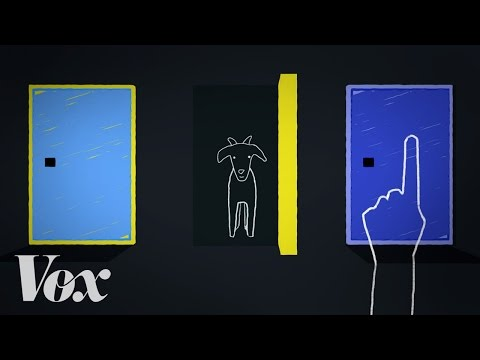

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('ggDQXlinbME', width=600, height=400)